<a href="https://colab.research.google.com/github/elantunes/mvp-qualidade-seguranca-sistemasinteligentes/blob/main/fumantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engenharia de Sistemas de Software Inteligentes

## Imports

In [47]:
"""Módulo para ignorar warnings."""
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

##Defs

In [48]:
def arredonda(valor):
    """Arredonda um float."""
    return round(valor,4)


def predizer(param_dados, param_scaler, param_modelo):
    """Faz a predição dos valores (0 ou 1)"""
    rescaled = param_scaler.transform(param_dados.reshape(1, -1))
    diagnostico = param_modelo.predict(rescaled)
    return int(diagnostico[0])

##Carga do Dataset

In [49]:
warnings.filterwarnings("ignore")


# Carga do dataset
print("Obtendo o dataset...")


# Informa a URL de importação do dataset
URL = 'https://raw.githubusercontent.com/elantunes/mvp-eng-software-para-sistemas-inteligentes/'\
      'main/datasets/fumantes-reduzido.csv'


# Lê o arquivo
dataset = pd.read_csv(URL, delimiter=',')


print("Dataset obtido!\n")


# Mostra as primeiras linhas do dataset
dataset.head()

Obtendo o dataset...
Dataset obtido!



,idade,altura(cm),peso(kg),cintura(cm),visão(esquerda),visão(direita),audição(esquerda),audição(direita),sistólica,relaxado,...,LDL,hemoglobina,proteína na urina,creatinina sérica,AST,ALT,Gtp,cáries dentárias,tártaro,fumante
0,55,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,27,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,69,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,39,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,33,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [50]:
# Separação em conjunto de treino e conjunto de teste com holdout
TEST_SIZE = .25 # tamanho do conjunto de teste
SEED = 7 # semente aleatória
array = dataset.values
numero_colunas_dataset = len(dataset.columns)-1

X = array[:,0:numero_colunas_dataset]
y = array[:,numero_colunas_dataset]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=TEST_SIZE, shuffle=True, random_state=SEED, stratify=y) # holdout com estratificação

##Modelagem e Inferência

###Criação e avaliação de modelos: dados normais, padronizados e normalizados (Por causa do SVM este bloco demora uns 2m30s)

KNN	 0.677	 0.0083
CART	 0.6809	 0.0184
NB	 0.7005	 0.0156
SVM	 0.7173	 0.0121
KNN-padr	 0.6958	 0.0111
CART-padr	 0.6839	 0.0176
NB-padr	 0.7005	 0.0156
SVM-padr	 0.7418	 0.017
KNN-norm	 0.6828	 0.0147
CART-norm	 0.6835	 0.0175
NB-norm	 0.7005	 0.0156
SVM-norm	 0.7283	 0.0159




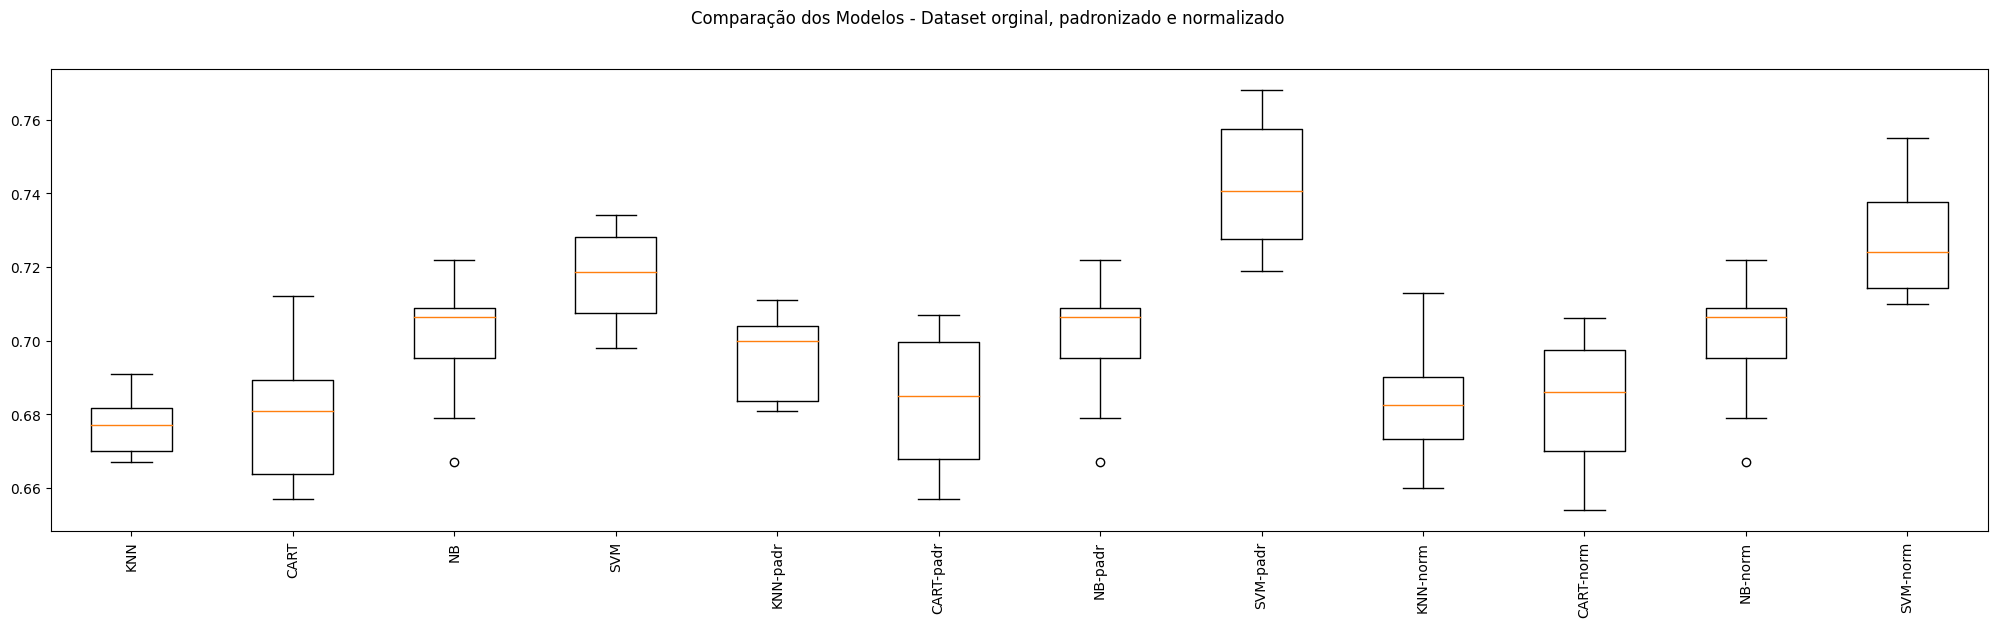

In [51]:
# Parâmetros e partições da validação cruzada
SCORING = 'accuracy'
NUM_PARTICOES = 10
 # validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=NUM_PARTICOES, shuffle=True, random_state=SEED)


# Modelagem e Inferência
np.random.seed(SEED) # definindo uma semente global


# Lista que armazenará os modelos
models = []


# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier(criterion='entropy'))
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN', Pipeline([knn])))
pipelines.append(('CART', Pipeline([cart])))
pipelines.append(('NB', Pipeline([naive_bayes])))
pipelines.append(('SVM', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))


# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=SCORING)
    results.append(cv_results)
    names.append(name)
    msg = f'{name}\t {arredonda(cv_results.mean())}\t {arredonda(cv_results.std())}'
    print(msg)

print('\n')

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

###Otimização dos hiperparâmetros

In [52]:
# Otimização dos hiperparâmetros

# Tuning do CART

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = { 'CART__criterion' : ['entropy'] }

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=SCORING, cv=kfold)
    grid.fit(X_train, y_train)
    #imprime a melhor configuração
    print(f'Sem tratamento de missings: {name} - '\
        f'Melhor: {arredonda(grid.best_score_)} usando: {grid.best_params_}')

Sem tratamento de missings: cart-orig - Melhor: 0.6757 usando: {'CART__criterion': 'entropy'}
Sem tratamento de missings: cart-padr - Melhor: 0.6732 usando: {'CART__criterion': 'entropy'}
Sem tratamento de missings: cart-norm - Melhor: 0.6797 usando: {'CART__criterion': 'entropy'}


###Finalização do Modelo

In [53]:
# Finalização do Modelo

# CART ###########################################################################################

# Preparação do modelo de treino
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino

# aplicação da normalização no conjunto de treino
rescaledX = scaler.transform(X_train)

# aplicação da hiperparametrização no conjunto de treino
modelCart = DecisionTreeClassifier(criterion='entropy')

modelCart.fit(rescaledX, y_train)

DecisionTreeClassifier(criterion='entropy')

##Estimativas de acurácias dos conjuntos

###CART

In [54]:
# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = modelCart.predict(rescaledTestX)
print('Estimativas do dataset de teste usando CART:')
print(f'Acurácia\t {accuracy_score(y_test, predictions)}')
print(f'Precisão\t {arredonda(precision_score(y_test, predictions))}')
print('\n')

# Estimativa da acurácia no conjunto de TODO dataset
rescaledX = scaler.transform(X) # aplicação da padronização no conjunto de todo dataset
predictions = modelCart.predict(rescaledX)
print('Estimativas do dataset completo usando CART:')
print(f'Acurácia\t {accuracy_score(y, predictions)}')
print(f'Precisão\t {arredonda(precision_score(y, predictions))}')

Estimativas do dataset de teste usando CART:
Acurácia	 0.6504
Precisão	 0.5155


Estimativas do dataset completo usando CART:
Acurácia	 0.9126
Precisão	 0.8726


###SVM

In [55]:
# Preparação do modelo de treino
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
modelSVM = SVC()
modelSVM.fit(rescaledX, y_train)


# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = modelSVM.predict(rescaledTestX)
print('Estimativas do dataset de teste usando SVM:')
print(f'Acurácia\t {accuracy_score(y_test, predictions)}')
print(f'Precisão\t {arredonda(precision_score(y_test, predictions))}')


# Estimativa da acurácia no conjunto de TODO dataset
rescaledX = scaler.transform(X) # aplicação da padronização no conjunto de todo dataset
predictions = modelSVM.predict(rescaledX)
print('Estimativas do dataset completo usando SVM:')
print(f'Acurácia\t {accuracy_score(y, predictions)}')
print(f'Precisão\t {arredonda(precision_score(y, predictions))}')
print('\n')

Estimativas do dataset de teste usando SVM:
Acurácia	 0.7308
Precisão	 0.6407
Estimativas do dataset completo usando SVM:
Acurácia	 0.7775
Precisão	 0.7116




##Simulando a aplicação do modelo em dados não vistos utilizando o CART

In [57]:
# CART
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
model = modelCart

X_input = np.array([27,160,60,81,.8,.6,1,1,119,70,130,192,115,42,127,12.7,1,
                    .6,22,19,18,0,1])
diagnosis = predizer(X_input, scaler, model)
print(f'#1\t {int(X_input[0])}\t Esperado:0\t Atingido:{diagnosis}')

X_input = np.array([69,170,60,80,.8,.8,1,1,138,86,89,242,182,55,151,15.8,1,1,
                    21,16,22,0,0])
diagnosis = predizer(X_input, scaler, model)
print(f'#2\t {int(X_input[0])}\t Esperado:1\t Atingido:{diagnosis}')

X_input = np.array([82,150,65,81.5,1.2,1.2,1,1,134,86,86,238,117,63,152,12,1,
                    0.9,19,11,16,0,0])
diagnosis = predizer(X_input, scaler, model)
print(f'#3\t {int(X_input[0])}\t Esperado:0\t Atingido:{diagnosis}')

X_input = np.array([31,160,60,86,.7,.6,1,1,133,80,139,223,151,44,149,16.3,1,
                    1.1,26,34,38,0,1])
diagnosis = predizer(X_input, scaler, model)
print(f'#4\t {int(X_input[0])}\t Esperado:1\t Atingido:{diagnosis}')

X_input = np.array([71,165,65,84,1,1,1,1,120,76,95,235,132,52,166,13.7,4,.9,
                    29,24,13,0,0])
diagnosis = predizer(X_input, scaler, model)
print(f'#5\t {int(X_input[0])}\t Esperado:0\t Atingido:{diagnosis}')


#1	 27	 Esperado:0	 Atingido:0
#2	 69	 Esperado:1	 Atingido:1
#3	 82	 Esperado:0	 Atingido:0
#4	 31	 Esperado:1	 Atingido:1
#5	 71	 Esperado:0	 Atingido:0


O modelo criado com algoritmo Support Vector Machine (SVM) padronizado  mostrou-se com a mais alta taxa de acurácia quando submetido ao dataset de teste. Atingindo o valor de acurácia de 0,73.

Porém quando o modelo foi criado com algorito de Árvore de Decisão (utilizando o critério de Entropia) e foi submetido aos dados do dataset completo a taxa de acurácia alcancou 0,9126.